# Stock News API

#### Imports / Keys

In [3]:
import requests
from configparser import ConfigParser
from io import BytesIO
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
parser = ConfigParser()
_ = parser.read('notebook.cfg')
snap_auth_key = parser.get('my_api', 'snap_key')

## SNAP Top News

In [14]:
### API call
url = f'https://stocknewsapi.com/api/v1/category?section=general&items=50&token={snap_auth_key}'
r = requests.get(url)
r

<Response [200]>

In [16]:
top_news = r.json()

In [34]:
top_news.keys()

dict_keys(['data'])

In [28]:
top_news['data'][1]

{'news_url': 'https://seekingalpha.com/article/4474743-stock-market-new-historical-high-for-s-and-p-500',
 'image_url': 'https://cdn.snapi.dev/images/v1/b/a/m02d20210325t2i1556169604w940fhfwllplsqrlynxmpeh2o0wy-738702-1146397.jpg',
 'title': 'The Stock Market: New Historical High For S&P 500',
 'text': 'The Stock Market: New Historical High For S&P 500',
 'source_name': 'Seeking Alpha',
 'date': 'Sun, 12 Dec 2021 00:47:53 -0500',
 'topics': ['paylimitwall'],
 'sentiment': 'Neutral',
 'type': 'Article'}

### Pulling all Relevant News Content

### Image Request Example

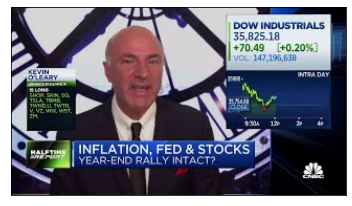

In [9]:
url = 'https://cdn.snapi.dev/images/v1/m/q/a-little-inflation-is-good-for-corporate-pricing-power-says-kevin-oleary-1145735.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.resize((500,500), Image.ANTIALIAS)

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.imshow(img)
plt.show()

In [54]:
top_news['data'][0]

{'news_url': 'https://seekingalpha.com/article/4474744-yes-inflation-is-now-an-issue-technically-speaking',
 'image_url': 'https://cdn.snapi.dev/images/v1/h/c/im-245290width620size1549636803874092-738742-1146398.jpg',
 'title': 'Yes, Inflation Is Now An Issue (Technically Speaking For 12/6-12/10)',
 'text': 'Yes, Inflation Is Now An Issue (Technically Speaking For 12/6-12/10)',
 'source_name': 'Seeking Alpha',
 'date': 'Sun, 12 Dec 2021 00:56:57 -0500',
 'topics': ['tanalysis', 'paylimitwall'],
 'sentiment': 'Neutral',
 'type': 'Article'}

In [17]:
#Image URL 
top_news['data'][0]['image_url']

'https://cdn.snapi.dev/images/v1/8/x/im-315192-735781-1146543.jpg'

In [56]:
#News URL 
top_news['data'][0]['news_url']

'https://seekingalpha.com/article/4474744-yes-inflation-is-now-an-issue-technically-speaking'

In [57]:
#Headline
top_news['data'][0]['title']

'Yes, Inflation Is Now An Issue (Technically Speaking For 12/6-12/10)'

In [29]:
#Text
top_news['data'][0]['text']

'On a wide range of typically market-sensitive topics today, investors seem inclined to ignore both the rumor and the news, assuming that whatever happens, the Fed will be there to backstop any fallout. Expectations of stickier inflation have already brought forward the calendar many investors have in their heads for interest rate increases, with the consensus now being for at least two hikes sometime in the second half of 2022. The rumor has gained enough traction to become conventional wisdom.'

In [66]:
#Source
top_news['data'][0]['source_name']

'Seeking Alpha'

In [67]:
#Date
top_news['data'][0]['date']

'Sun, 12 Dec 2021 00:56:57 -0500'

In [68]:
#Sentiment
top_news['data'][0]['sentiment']

'Neutral'

#### Set up Sentiment Headline Counter

In [71]:
sentiment = []
for i in range(len(top_news['data'])):
    sentiment.append(top_news['data'][i]['sentiment'])

In [75]:
np.array(sentiment)

array(['Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Negative', 'Negative', 'Neutral',
       'Neutral', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Positive', 'Negative', 'Neutral', 'Neutral',
       'Positive', 'Negative', 'Positive', 'Neutral', 'Positive',
       'Negative', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral',
       'Neutral', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Neutral',
       'Negative', 'Neutral', 'Positive', 'Neutral', 'Positive',
       'Negative'], dtype='<U8')

In [81]:
df = pd.DataFrame(data=np.array(sentiment), index=None,  columns=['sentiment'])

In [87]:
df.value_counts()

sentiment
Neutral      25
Negative     13
Positive     12
dtype: int64

In [91]:
neutral_count = df.value_counts()[0]
neutral_count

25

In [93]:
negative_count = df.value_counts()[1]
negative_count

13

In [92]:
positive_count = df.value_counts()[2]
positive_count

12

#### Loop Through All Top News

In [62]:
for i in range(len(top_news['data'])):
    print(top_news['data'][i]['title'])

Yes, Inflation Is Now An Issue (Technically Speaking For 12/6-12/10)
The Stock Market: New Historical High For S&P 500
The Negative Yield Strikes Back
Holiday Sales Reports are Top of Mind for Investors
U.S. Inflation Data Appears Consistent With Faster Fed Tapering And Interest Rate Hikes
Rates Outlook: If The 10yr Treasury Can't Hit 2%, The Fed Can Forget About It Too
Market Snapshot: How far will ‘Powell's new hawkish tilt' go? Here's what investors will be looking for from the Fed's meeting next week
Report: Data and enterprise automation will drive tech and media spending to $2.5T
Decarbonization And 'Greenflation'
Wall Street executives slammed for embracing China
The 7 Biggest Threats to the Stock Market in 2022
Outlook For 2022: Continued Investment Opportunities Related To COVID-19 Pandemic; Drug Price Legislation Flawed
The Markets Are Running On Hopium
Record-Setting Gains In Wealth Threatened By Rising Inflation
The Week On Wall Street: The S&P Rolls To Another New High
202

## SNAP Single Ticker News

In [4]:
### API call
url2 = f'https://stocknewsapi.com/api/v1?tickers=FB&items=50&token={snap_auth_key}'
r2 = requests.get(url2)
r2

<Response [200]>

In [5]:
ticker_news = r2.json()

In [7]:
ticker_news['data'][1]

{'news_url': 'https://www.youtube.com/watch?v=LhP8QtW8M2I',
 'image_url': 'https://cdn.snapi.dev/images/v1/s/8/s8i2dd-1148326.',
 'title': 'Best way to buy the metaverse',
 'text': "Hartley Investments CEO Zac Hartley discusses metaverse opportunity on 'Making Money.' #FOXBusiness Subscribe to Fox Business!",
 'source_name': 'Fox Business',
 'date': 'Mon, 13 Dec 2021 17:50:02 -0500',
 'topics': [],
 'sentiment': 'Positive',
 'type': 'Video',
 'tickers': ['FB', 'META', 'NVDA', 'U']}